In [322]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
import random
import os

In [2]:
def get_image_with_facepoints(img_num):
    data_path = f'data/lfpw/trainset/image_{img_num:04d}'
    img_path = data_path + '.png'
    points_path = data_path + '.pts'
    face_points = []
    with open(points_path, 'r') as f:
        lines = f.readlines()
        for n, line in enumerate(lines):
            if 2 < n < 71:
                data = line.strip().split()
                face_points.append((float(data[0]), float(data[1])))

    original_image = Image.open(img_path)
    return original_image, face_points

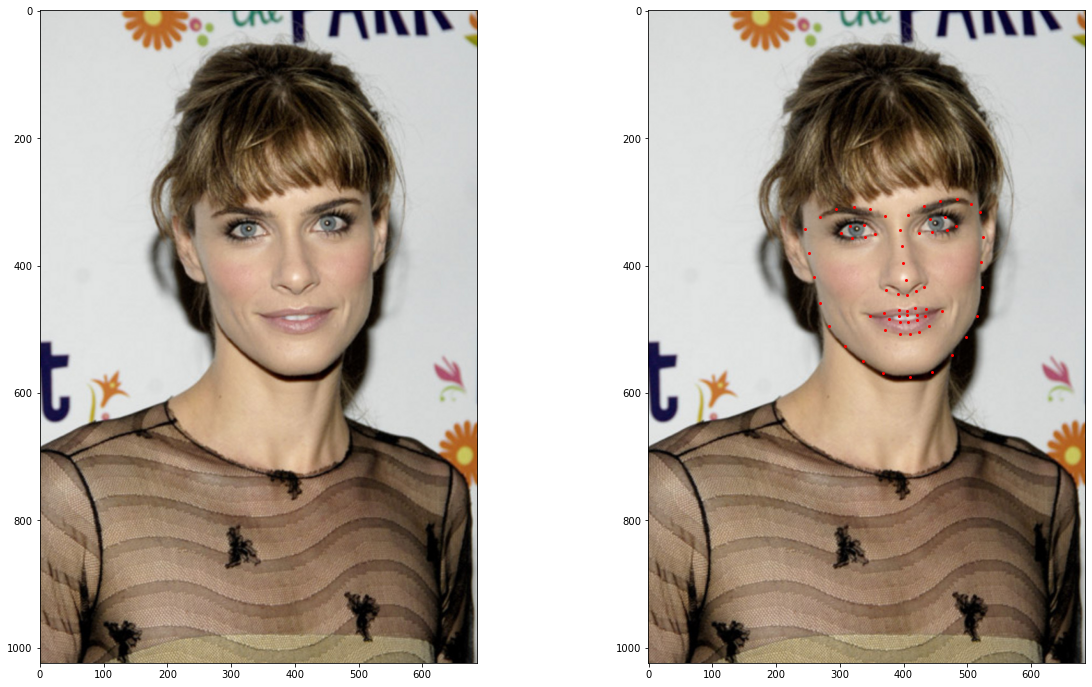

In [3]:
image, face_points = get_image_with_facepoints(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))
axes[0].imshow(image)
axes[1].imshow(image)
for point in face_points:
    axes[1].scatter(point[0], point[1], s=4, color='red')

In [4]:
# Mask keypoints parameters
# Percentage of masks that will cover chin
mask_chin_threshold = 0.7

# Percentage of masks that will cover nose
mask_nose_threshold = 0.6

def get_mask_keypoints(face_keypoints):
    keypoints = face_keypoints[1:16]
    keypoints.append(face_keypoints[30])
    return keypoints

def get_face_with_mask(image, face_keypoints):
    mask_pattern = Image.new('RGBA', image.size, (225, 25, 45, 0))
    mask = Image.new('RGBA', image.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(mask)
    draw.polygon(get_mask_keypoints(face_keypoints), fill=(255, 255, 0))
    mask = mask.filter(ImageFilter.GaussianBlur(radius=2))
    return Image.composite(mask_pattern, image, mask)

Number 165


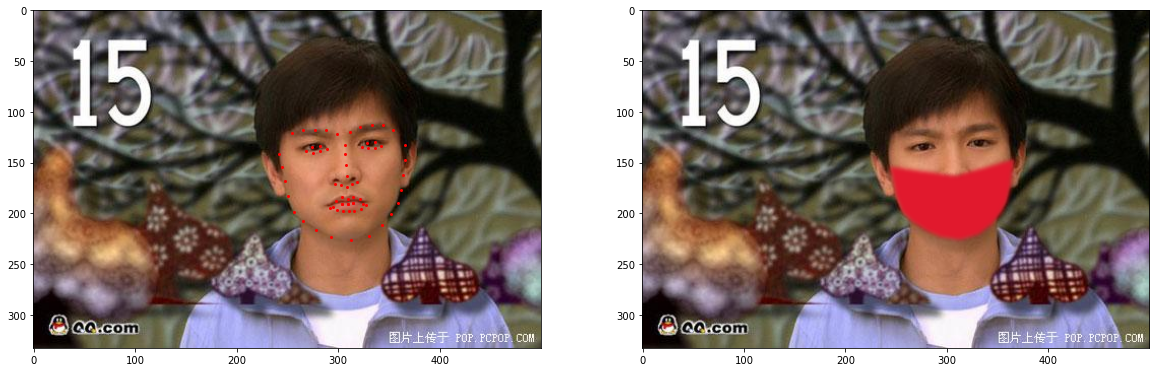

In [5]:
num = random.randint(1, 872)
image, face_points = get_image_with_facepoints(num)
print(f'Number {num}')
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
axes[0].imshow(image)
for point in face_points:
    axes[0].scatter(point[0], point[1], s=4, color='red')
axes[1].imshow(get_face_with_mask(image, face_points))


In [58]:
import copy
import importlib
import utils.mask_utils
importlib.reload(utils.mask_utils)
import numpy as np

<module 'utils.mask_utils' from '/home/strv/Projects/mask2face/utils/mask_utils.py'>

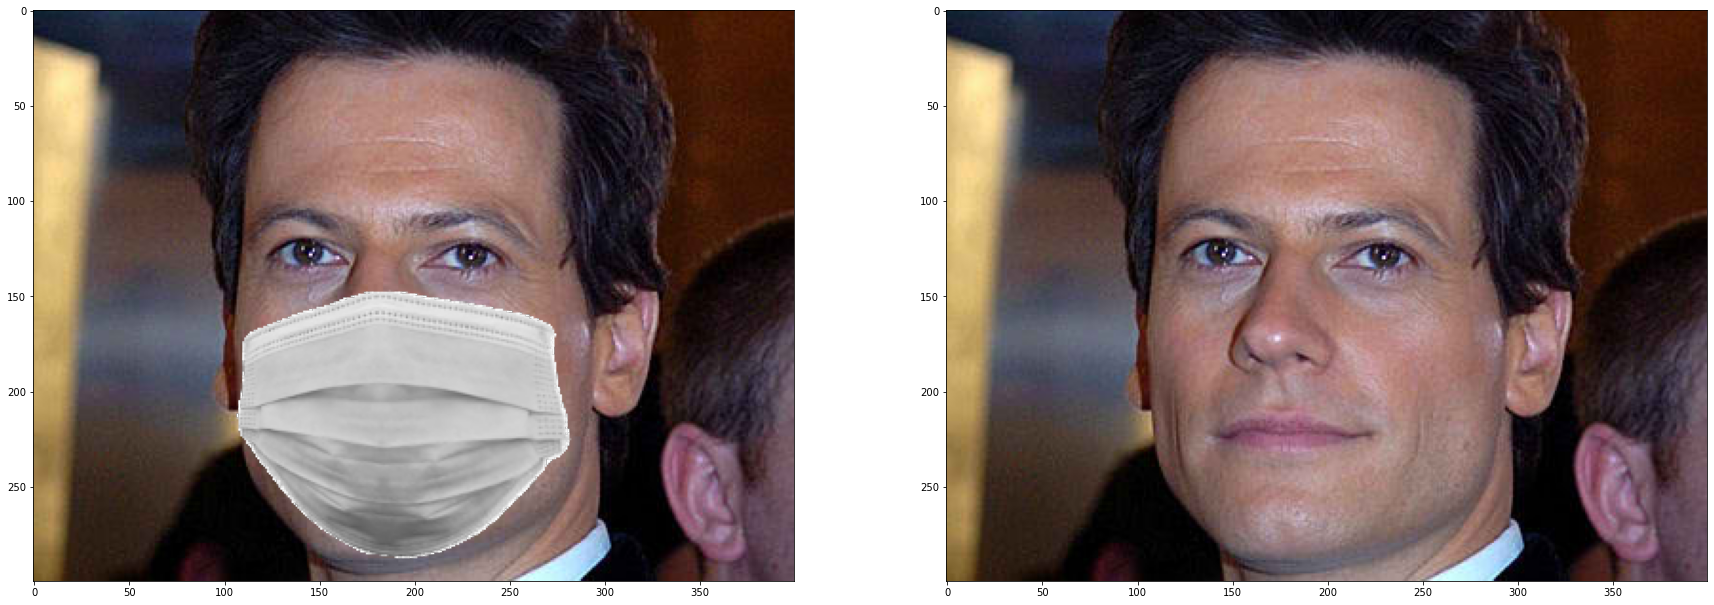

In [326]:
importlib.reload(utils.mask_utils)
importlib.reload(utils.mask_utils)
importlib.reload(utils.mask_utils)

class Arguments:
    def __init__(self):
        self.mask_type = 'surgical' # ["surgical", "N95", "KN95", "cloth", "gas", "inpaint", "random", "all"]
        self.color = None # string with hex color like #|000000
        self.pattern = '' # path to file with pattern
        self.pattern_weight = 0.9 # number from 0 to 1
        self.color_weight = 0.8 # number from 0 to 1

num = random.randint(1, 872)
args = Arguments()
image, face_points = get_image_with_facepoints(656)
masked_image = utils.mask_utils.mask_image(copy.deepcopy(image), face_points, args)

fig, axes = plt.subplots(1, 2, figsize=(30, 20))
axes[0].imshow(masked_image)
axes[1].imshow(image)
# m = np.array(masked_image)
ii = 1
image.save(f'data/train_lfpw/outputs/{ii}.png')
masked_image.save(f'data/train_lfpw/inputs/{ii}.png')

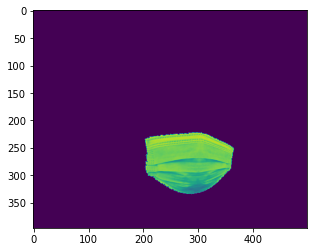

In [246]:
mask = np.array(masked_image, dtype='uint8')
mask = np.sum(mask[:, :, 0:3], axis=2)
mask = np.clip(mask, 0, 255)
mask = mask.astype('uint8')
mask_img = Image.fromarray(mask, 'L')
masked_face = Image.composite(image, image, mask_img)
plt.imshow(mask)
mask2 = np.array(mask)

In [332]:
nono = [38,57,64,65,69,76,86,91,92,93,94,99,100,104,140,142,143,145,159,163,162,169,178,182,184,185,188,189,190,192,193,196,201,205,214,215,218,227,226,240,254,252,253,273,285,296,308,306,328,330,332,333,351,357,353,360,363,370,377,390,406,409,412,420,426,438,442,443,444,445,451,453,460,458,470,483,474,490,498,502,501,499,530,539,549,552,556,555,550,541,562,573,579,583,591,592,594,596,598,601,602,617,622,623,624,615,611,616,631,635,633,639,637,641,644,645,647,648,649,658,662,681,698,715,721,722,723,726,731,732,733,734,747,748,755,762,766,774,779,783,788,789,791,793,796,797,798,811,839,846,851,]

def get_list_of_image_nums():
    nums = []
    for img_num in range(1,872):
        data_path = f'data/lfpw/trainset/image_{img_num:04d}'
        points_path = data_path + '.pts'
        if os.path.isfile(points_path) and img_num not in nono:
            nums.append(img_num)
    return nums
n = get_list_of_image_nums()
print(n)
random.shuffle(n)
print(n)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 95, 96, 97, 98, 101, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 160, 161, 164, 165, 166, 167, 168, 170, 172, 174, 176, 177, 180, 186, 187, 191, 195, 197, 198, 199, 200, 202, 203, 204, 206, 207, 209, 210, 211, 212, 216, 217, 219, 220, 221, 222, 223, 224, 225, 228, 229, 230, 232, 233, 234, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 286, 288, 289, 2

In [334]:
repeate = 3
data_num = 0
args.mask_type = 'random'
for i in range(repeate):
    random.shuffle(n)
    for img_num in n:
        image, face_points = get_image_with_facepoints(img_num)
        masked_image = utils.mask_utils.mask_image(copy.deepcopy(image), face_points, args)

        image.save(f'data/train_lfpw/outputs/{data_num}.png')
        masked_image.save(f'data/train_lfpw/inputs/{data_num}.png')
        data_num += 1


KeyboardInterrupt: 